In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

In [66]:
df = pd.read_csv('datasetmotorbersih.csv')
df.head()

,ID,Merek,Harga (Juta),Kapasitas Mesin (cc),Transmisi,Konsumsi BBM (km/l),Berat (kg)
0,1,Honda NMAX,43,281,Manual,31,159
1,2,Yamaha Beat,17,116,Otomatis,64,96
2,3,Kawasaki Vario,24,149,Otomatis,46,106
3,4,Suzuki CBR,42,280,Manual,33,134
4,5,Suzuki Vario,29,156,Otomatis,41,102


In [67]:
df.info()
df.describe()
df.isnull().sum()  # cek missing value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    150 non-null    int64 
 1   Merek                 150 non-null    object
 2   Harga (Juta)          150 non-null    int64 
 3   Kapasitas Mesin (cc)  150 non-null    int64 
 4   Transmisi             150 non-null    object
 5   Konsumsi BBM (km/l)   150 non-null    int64 
 6   Berat (kg)            150 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 8.3+ KB


ID                      0
Merek                   0
Harga (Juta)            0
Kapasitas Mesin (cc)    0
Transmisi               0
Konsumsi BBM (km/l)     0
Berat (kg)              0
dtype: int64

In [68]:
df['Transmisi'] = df['Transmisi'].map({'Otomatis': 1, 'Manual': 0})


In [69]:
print(df['Transmisi'])

0      0
1      1
2      1
3      0
4      1
      ..
145    1
146    0
147    0
148    0
149    1
Name: Transmisi, Length: 150, dtype: int64


In [70]:
features = ['Harga (Juta)', 'Kapasitas Mesin (cc)', 'Transmisi', 'Konsumsi BBM (km/l)', 'Berat (kg)']
X = df[features]

In [71]:
# 2. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# === KMeans Clustering ===
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [73]:
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [74]:

# === Tambahkan cluster ke DataFrame ===
df = df.loc[X.index].copy()
df['cluster'] = clusters

In [75]:
df

,ID,Merek,Harga (Juta),Kapasitas Mesin (cc),Transmisi,Konsumsi BBM (km/l),Berat (kg),cluster
0,1,Honda NMAX,43,281,0,31,159,1
1,2,Yamaha Beat,17,116,1,64,96,0
2,3,Kawasaki Vario,24,149,1,46,106,0
3,4,Suzuki CBR,42,280,0,33,134,1
4,5,Suzuki Vario,29,156,1,41,102,0
...,...,...,...,...,...,...,...,...
145,146,Yamaha Aerox,21,152,1,42,103,0
146,147,Honda Aerox,29,127,0,54,112,0
147,148,Honda Supra X,18,102,0,59,100,0
148,149,Yamaha Ninja,37,232,0,39,150,1


In [76]:
# 3. Tentukan jumlah cluster optimal (Elbow Method)
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

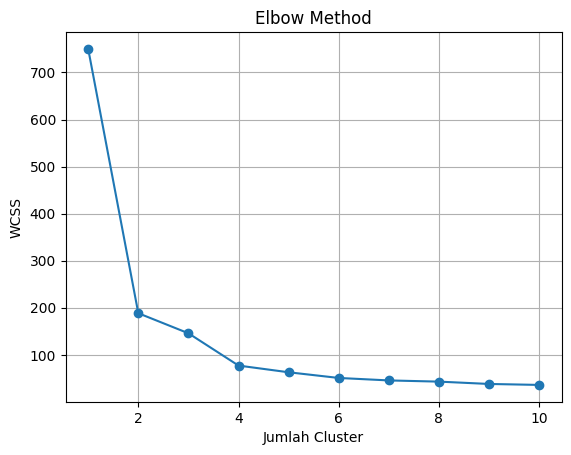

In [77]:
# Visualisasi Elbow
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [78]:
# 4. (Opsional) Cek Silhouette Score
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score untuk {k} cluster: {score:.3f}")

Silhouette Score untuk 2 cluster: 0.642
Silhouette Score untuk 3 cluster: 0.497
Silhouette Score untuk 4 cluster: 0.631
Silhouette Score untuk 5 cluster: 0.438
Silhouette Score untuk 6 cluster: 0.437


In [79]:
# 6. Visualisasi Clustering dengan PCA (2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

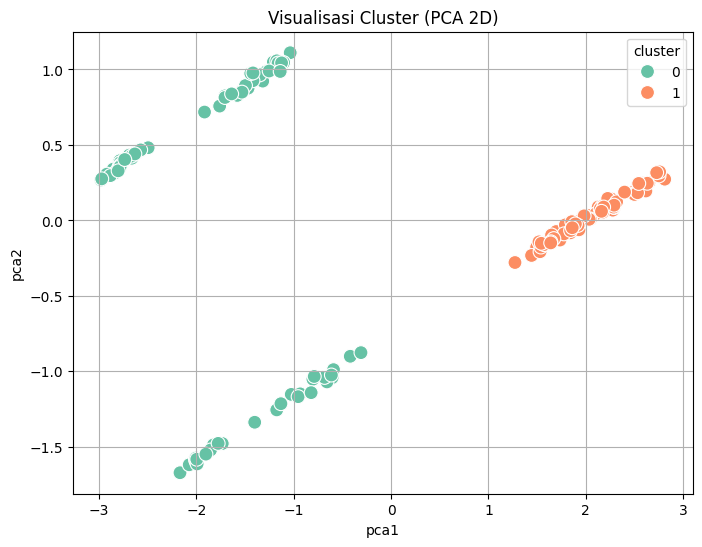

In [80]:
# Plot hasil cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', s=100)
plt.title("Visualisasi Cluster (PCA 2D)")
plt.grid(True)
plt.show()

In [81]:

df.to_csv("dataset_clustered.csv", index=False)